<a href="https://colab.research.google.com/github/Santhoshraj124/git-tutorial-/blob/main/Another_copy_of_plant_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

In [3]:
!ls "/content/drive/My Drive/plant"

 Apple___rot		'plant project.h5'    'plant project.weights.h5'
'diseased cotton leaf'	'plant project.json'   Tomato___Bacterial_spot


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation , Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

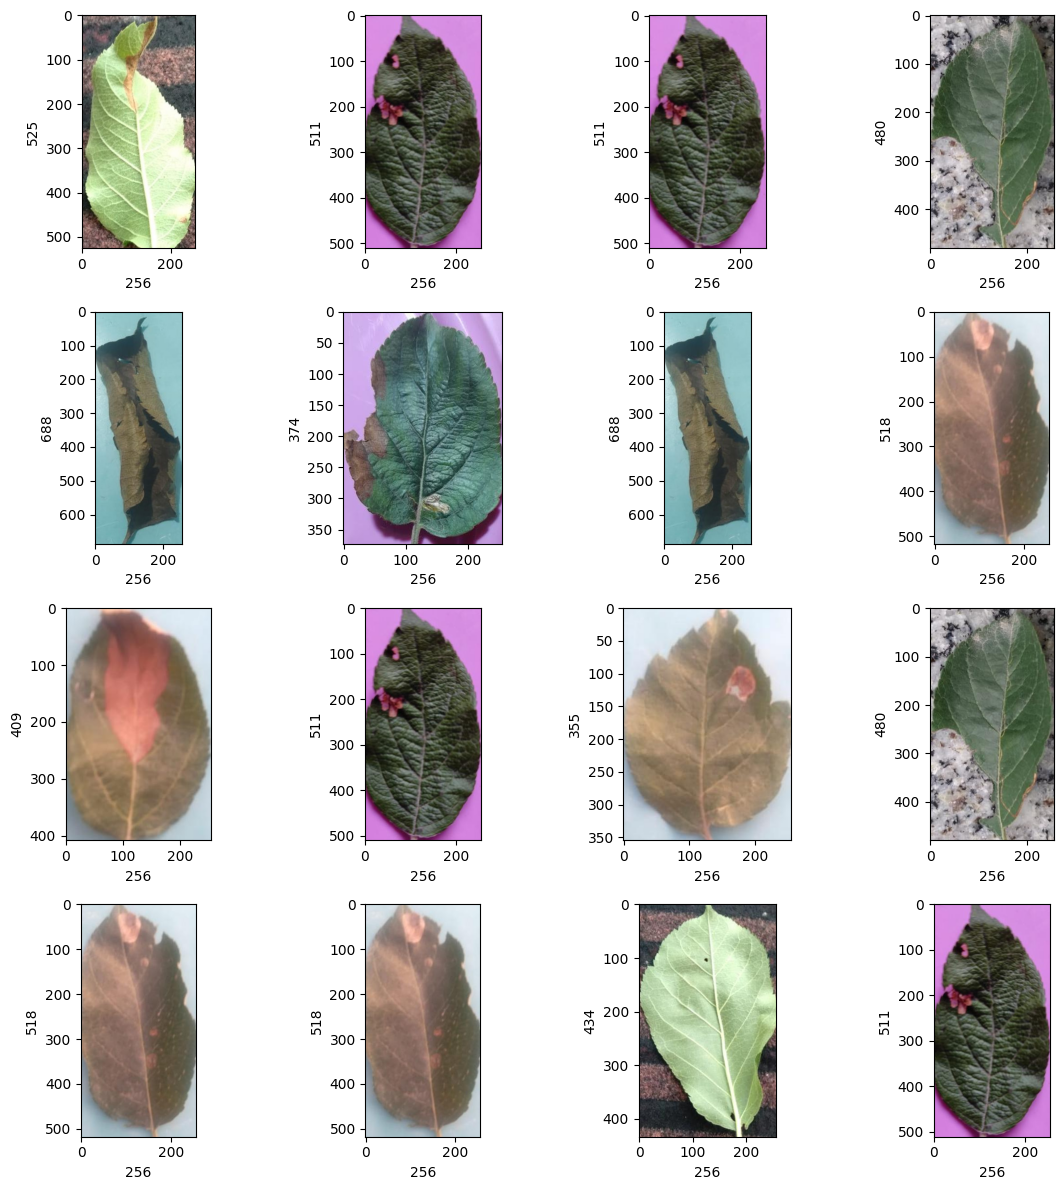

In [5]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/plant/Apple___rot"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [6]:
def convert_images_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 276))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
#

In [7]:
dir = "/content/drive/My Drive/plant"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Apple___rot','diseased cotton leaf','Tomato___Bacterial_spot']
binary_label = [0,1,2]
temp = -1

# Filter out non-directory items from root_dir
root_dir = [d for d in root_dir if os.path.isdir(os.path.join(dir, d))]


for directory in root_dir :
  plant_image_list = listdir(f"{dir}/{directory}")

  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_images_to_array(image_path))
    label_list.append(binary_label[temp]) #Use temp to assign correct labels


In [8]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,12
1,12
2,12


In [9]:
image_list[0].shape

(276, 256, 3)

In [10]:
label_list = np.array(label_list)
label_list.shape

(36,)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [12]:
x_train = np.array(x_train,dtype=np.float16) / 225.0
x_test = np.array(x_test,dtype=np.float16) / 225.0
x_train = x_train.reshape(-1,256,276,3)
x_test = x_test.reshape(-1,256,276,3)


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,276,3),activation="relu")) # Change input_shape to (256, 276, 3)
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Correct method to display the summary
model.summary()

# Correct method to display the summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 276, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 92, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 92, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,913,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,933,123 (30.26 MB)

 Trainable params: 7,933,123 (30.26 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 276, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 92, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 92, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,913,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,933,123 (30.26 MB)

 Trainable params: 7,933,123 (30.26 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [16]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [17]:
epochs = 20
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3182 - loss: 1.1116 - val_accuracy: 0.1667 - val_loss: 11.7726
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3636 - loss: 6.2231 - val_accuracy: 0.3333 - val_loss: 7.5496
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4091 - loss: 5.9475 - val_accuracy: 0.8333 - val_loss: 1.4517
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: 2.3870 - val_accuracy: 0.5000 - val_loss: 1.6958
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2273 - loss: 2.6598 - val_accuracy: 0.1667 - val_loss: 1.5662
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3636 - loss: 1.2827 - val_accuracy: 0.3333 - val_loss: 1.8297
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3636 - loss: 1.0626 - val_accuracy: 0.5000 - val_loss: 0.9918
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7727 - loss: 0.3964 - val_accuracy: 0.8333 - val_loss: 0.5877
Epoch 9/20
1/1 

In [ ]:
model.save("/content/drive/My Drive/plant/plant project.h5")
json_model = model.to_json()
with open("/content/drive/My Drive/plant/plant project.json", "w") as json_file:
    json_file.write(json_model)

model.save_weights("/content/drive/My Drive/plant/plant project.weights.h5")




<ipython-input-18-2a67258a5969>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


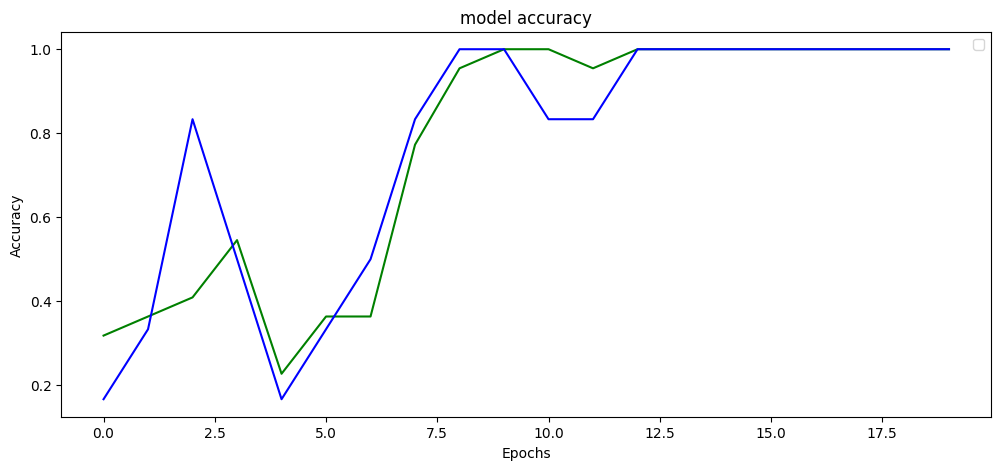

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='green', )
plt.plot(history.history['val_accuracy'], color='blue',)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('model accuracy')
plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8750 - loss: 0.2981
Test Accuracy: 87.5


In [20]:
y_pred = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


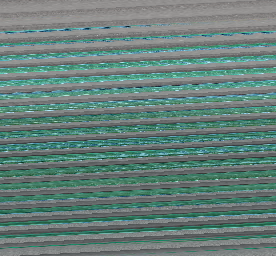

In [21]:
img = array_to_img(x_test[7])
img


In [23]:
print("orginally",all_labels[np.argmax(y_test[7])])
print("predicted",all_labels[np.argmax(y_pred[7])])
model.save('my_model.keras')



orginally Apple___rot
predicted Apple___rot
